In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from scipy.optimize import curve_fit
plt.style.use('seaborn-v0_8-bright')
#plt.style.use('ggplot')

#STAT function

def rm(m,o):
        rm= (np.nanmean((m-o) ** 2)) ** 0.5
        return rm #(round(rm,2))

def bi(m,o):
        bias= (np.nanmean(m-o))
        return bias #(round(bias,2))

def mae(m,o): #### mae = (1/n) * ∑|yi – xi|
        mae = np.nanmean(abs(m-o))
        return mae    
# Cargar los datos de los archivos PKL en DataFrames
#path0 = 'meteo-2017-21019_por-hora_formato.csv'
path0 ='df_obs-MONTEMAR-hourly-2017-2019.pkl'
path1 = 'Wrf_viña-montemar-2017-2019_1dia.pkl'
path2 = 'Wrf_viña-montemar-2017-2019_2dia.pkl'
path3 = 'Wrf_viña-montemar-2017-2019_3dia.pkl'

#df_obs = pd.read_csv(path0)
df_obs = pd.read_pickle(path0)
df_wrf1 = pd.read_pickle(path1)
df_wrf2 = pd.read_pickle(path2)
df_wrf3 = pd.read_pickle(path3)

### correccion de formato para data frame modelo wrf
df_wrf1.index = df_wrf1.index.round('H')
df_wrf2.index = df_wrf2.index.round('H')
df_wrf3.index = df_wrf3.index.round('H')

#correccion unidad T2, de kelvin a celcius
df_wrf1['T2']=df_wrf1['T2']-273.16
df_wrf2['T2']=df_wrf2['T2']-273.16
df_wrf3['T2']=df_wrf3['T2']-273.16

df_wrf1 = df_wrf1.applymap(lambda x: round(x, 0))
df_wrf2 = df_wrf2.applymap(lambda x: round(x, 0))
df_wrf3 = df_wrf3.applymap(lambda x: round(x, 0))

### reagrupamos los dataframe para el mismo index, contiene valores nan en las columnas
df_comun1 = pd.merge(df_obs, df_wrf1, left_index=True, right_index=True, how='inner')
df_comun2 = pd.merge(df_obs, df_wrf2, left_index=True, right_index=True, how='inner')
df_comun3 = pd.merge(df_obs, df_wrf3, left_index=True, right_index=True, how='inner')


In [20]:
print('Cantidad original de datos OBS : ', df_obs.shape)
print('Cantidad original de datos pronostico wrf 1 dia : ', df_wrf1.shape)
print('Cantidad original de datos pronostico wrf 2 dia : ', df_wrf2.shape)
print('Cantidad original de datos pronostico wrf 3 dia : ', df_wrf3.shape)

print('\n Datos obsevados No Nan:\n', df_obs.count())
print('\n Datos comun index observado con index pronostico 1 dia (nonan):\n',df_comun1.count())
print('\n Datos comun index observado con index pronostico 2 dia (nonan):\n',df_comun2.count())
print('\n Datos comun index observado con index pronostico 3 dia (nonan):\n',df_comun3.count())


Cantidad original de datos OBS :  (25708, 5)
Cantidad original de datos pronostico wrf 1 dia :  (23420, 5)
Cantidad original de datos pronostico wrf 2 dia :  (23242, 5)
Cantidad original de datos pronostico wrf 3 dia :  (23037, 5)

 Datos obsevados No Nan:
 td2_obs     25702
rh2_obs     25702
T2_obs      25704
ws10_obs    25647
wd10_obs    18368
dtype: int64

 Datos comun index observado con index pronostico 1 dia (nonan):
 td2_obs     22878
rh2_obs     22878
T2_obs      22879
ws10_obs    22835
wd10_obs    16379
td2         22882
rh2         22882
T2          22882
ws10        22882
wd10        22882
dtype: int64

 Datos comun index observado con index pronostico 2 dia (nonan):
 td2_obs     22723
rh2_obs     22723
T2_obs      22725
ws10_obs    22670
wd10_obs    16283
td2         22729
rh2         22729
T2          22729
ws10        22729
wd10        22729
dtype: int64

 Datos comun index observado con index pronostico 3 dia (nonan):
 td2_obs     22494
rh2_obs     22494
T2_obs      2249

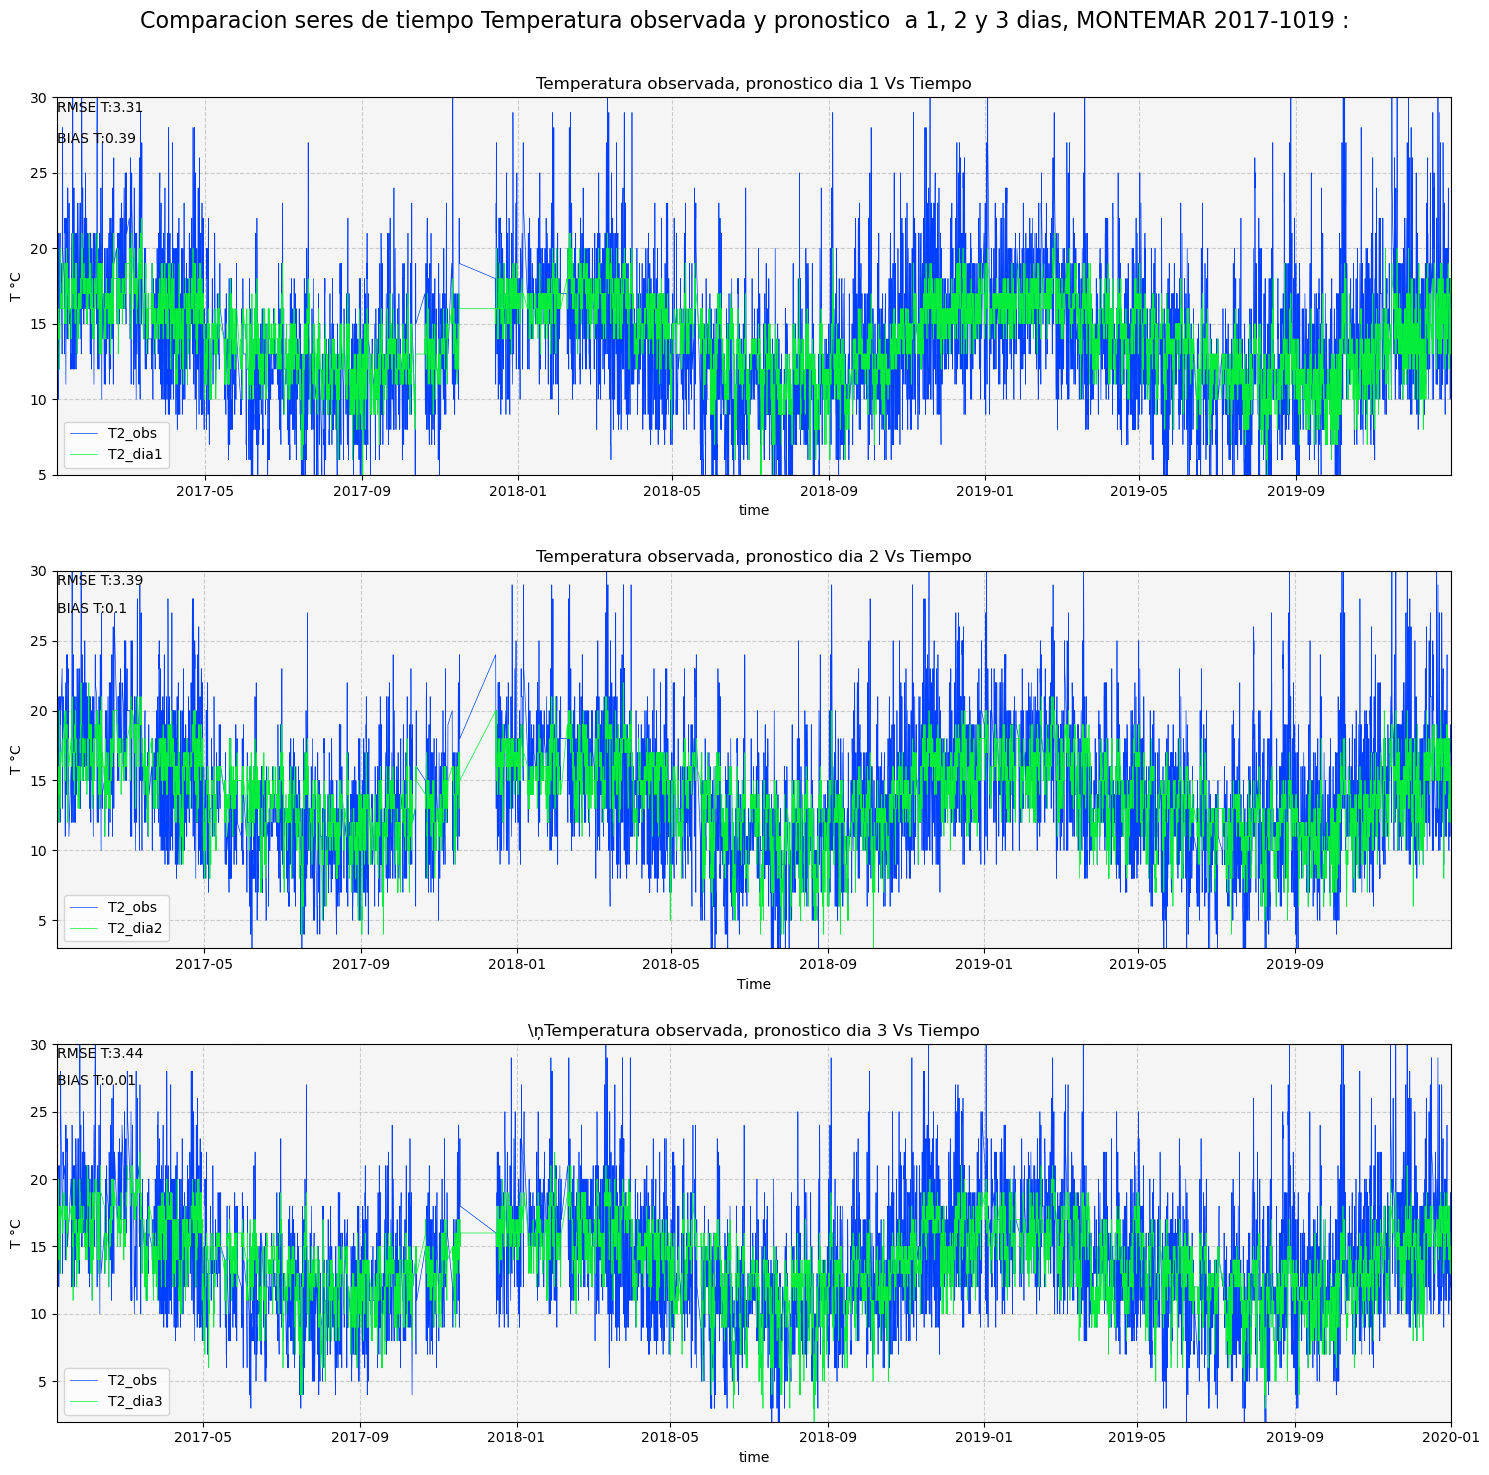

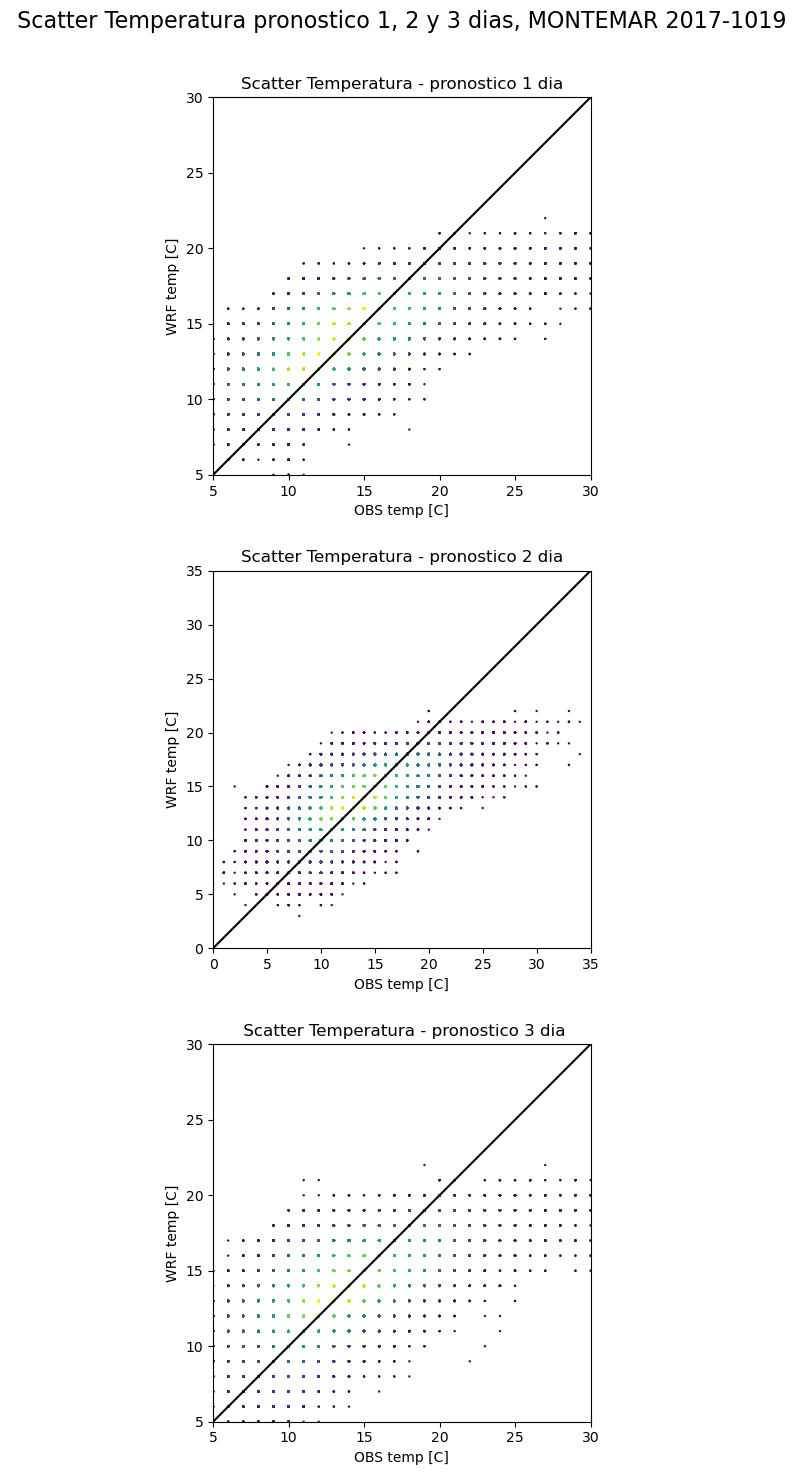

In [21]:

###### TEMPERATURA ######################
########################
var = 'T2'
unidad = 'T °C'

df1 = df_comun1[[var, var + '_obs']].dropna()
values1 = df1[[var, var + '_obs']].values.T

df2 = df_comun2[[var, var + '_obs']].dropna()
values2 = df2[[var, var + '_obs']].values.T

df3 = df_comun3[[var, var + '_obs']].dropna()
values3 = df3[[var, var + '_obs']].values.T


############ promedios y densidad de probabilidad para T2

densidad1 = gaussian_kde(values1)(values1)
densidad2 = gaussian_kde(values2)(values2)
densidad3 = gaussian_kde(values3)(values3)

##Calculo RMSE y BIAS para T2

rmse_t1 = rm(df1[var],df1[var + '_obs'])
text_rmt1 = "RMSE T:"+str(round(rmse_t1,2))
bi_t1 = bi(df1[var],df1[var + '_obs'])
text_bit1 = "BIAS T:"+str(round(bi_t1,2))

rmse_t2 = rm(df2[var],df2[var + '_obs'])
text_rmt2 = "RMSE T:"+str(round(rmse_t2,2))
bi_t2 = bi(df2[var],df2[var + '_obs'])
text_bit2 = "BIAS T:"+str(round(bi_t2,2))

rmse_t3 = rm(df3[var],df3[var + '_obs'])
text_rmt3 = "RMSE T:"+str(round(rmse_t3,2))
bi_t3 = bi(df3[var],df3[var + '_obs'])
text_bit3 = "BIAS T:"+str(round(bi_t3,2))


######################GRAFICAS#####
### panel de graficas series de tiempo:

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Comparacion seres de tiempo Temperatura observada y pronostico  a 1, 2 y 3 dias, MONTEMAR 2017-1019 :\n',
             fontsize=16)

for ax in axes:
    ax.set_facecolor('whitesmoke')
    ax.grid(True, linestyle='--', alpha=0.6)

### plot serie tiempo temperatura obs y dia1
axes[0].plot(df1[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[0].plot(df1[var], 
             label=var+'_dia1',
             linewidth=0.5)
axes[0].set_title('\nTemperatura observada, pronostico dia 1 Vs Tiempo')
axes[0].set_ylabel(unidad)
axes[0].set_xlabel('time')
axes[0].set_xlim(df1.index[0],df1.index[-1])
axes[0].set_ylim(df1[var].min(),30)
axes[0].text(df1.index[5],29,text_rmt1)
axes[0].text(df1.index[5],27,text_bit1)
axes[0].legend()

### plot serie tiempo temperatura obs y dia2
axes[1].plot(df2[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[1].plot(df2[var], 
             label=var+'_dia2',
             linewidth=0.5)
axes[1].set_title('\nTemperatura observada, pronostico dia 2 Vs Tiempo')
axes[1].set_ylabel(unidad)
axes[1].set_xlabel('Time')
axes[1].set_xlim(df2.index[0],df2.index[-1])
axes[1].set_ylim(df2[var].min(),30)
axes[1].text(df2.index[5],29,text_rmt2)
axes[1].text(df2.index[5],27,text_bit2)
axes[1].legend()

### plot serie tiempo temperatura obs y dia3
axes[2].plot(df3[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[2].plot(df3[var], 
             label=var+'_dia3',
             linewidth=0.5)
axes[2].set_title('\ņTemperatura observada, pronostico dia 3 Vs Tiempo')
axes[2].set_ylabel(unidad)
axes[2].set_xlabel('time')
axes[2].set_xlim(df3.index[0],df3.index[-1])
axes[2].set_ylim(df3[var].min(),30)
axes[2].text(df3.index[5],29,text_rmt3)
axes[2].text(df3.index[5],27,text_bit3)
axes[2].legend()

#plt.savefig('T_obs_dia_123_valpo_2017-2019.png')
#plt.savefig('T_obs_dia_123_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()

############################################
### panel de graficas scatter temperatura:

fig, axes = plt.subplots(3, 1,figsize=(15, 15))
fig.suptitle(' Scatter Temperatura pronostico 1, 2 y 3 dias, MONTEMAR 2017-1019 \n',
             fontsize=16)


    
### plot scatter pronostico 1 dia:
axes[0].scatter(df1[var + '_obs'], df1[var], 
                c = densidad1,
                s =0.5)
axes[0].plot([5,30],[5,30],'k')
axes[0].set_title('\nScatter Temperatura - pronostico 1 dia')
axes[0].set_ylabel('WRF temp [C]')
axes[0].set_xlabel('OBS temp [C]')
axes[0].set_xlim(5,30)
axes[0].set_ylim(5,30)
axes[0].set_aspect('equal', adjustable='box')


### plot scatter pronostico 2 dia:
axes[1].scatter(df2[var + '_obs'], df2[var], 
                c = densidad2,
                s =0.5)
axes[1].plot([0,35],[0,35],'k')
axes[1].set_title('\nScatter Temperatura - pronostico 2 dia')
axes[1].set_ylabel('WRF temp [C]')
axes[1].set_xlabel('OBS temp [C]')
axes[1].set_xlim(0,35)
axes[1].set_ylim(0,35)
axes[1].set_aspect('equal', adjustable='box')


### plot scatter pronostico 2 dia:
axes[2].scatter(df3[var + '_obs'], df3[var], 
                c = densidad3,
                s =0.5)
axes[2].plot([5,30],[5,30],'k')
axes[2].set_title('\n Scatter Temperatura - pronostico 3 dia')
axes[2].set_ylabel('WRF temp [C]')
axes[2].set_xlabel('OBS temp [C]')
axes[2].set_xlim(5,30)
axes[2].set_ylim(5,30)
axes[2].set_aspect('equal', adjustable='box')


#plt.savefig('scatter_T2_valpo_2017-2019.png')
#plt.savefig('scatter_T2_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()

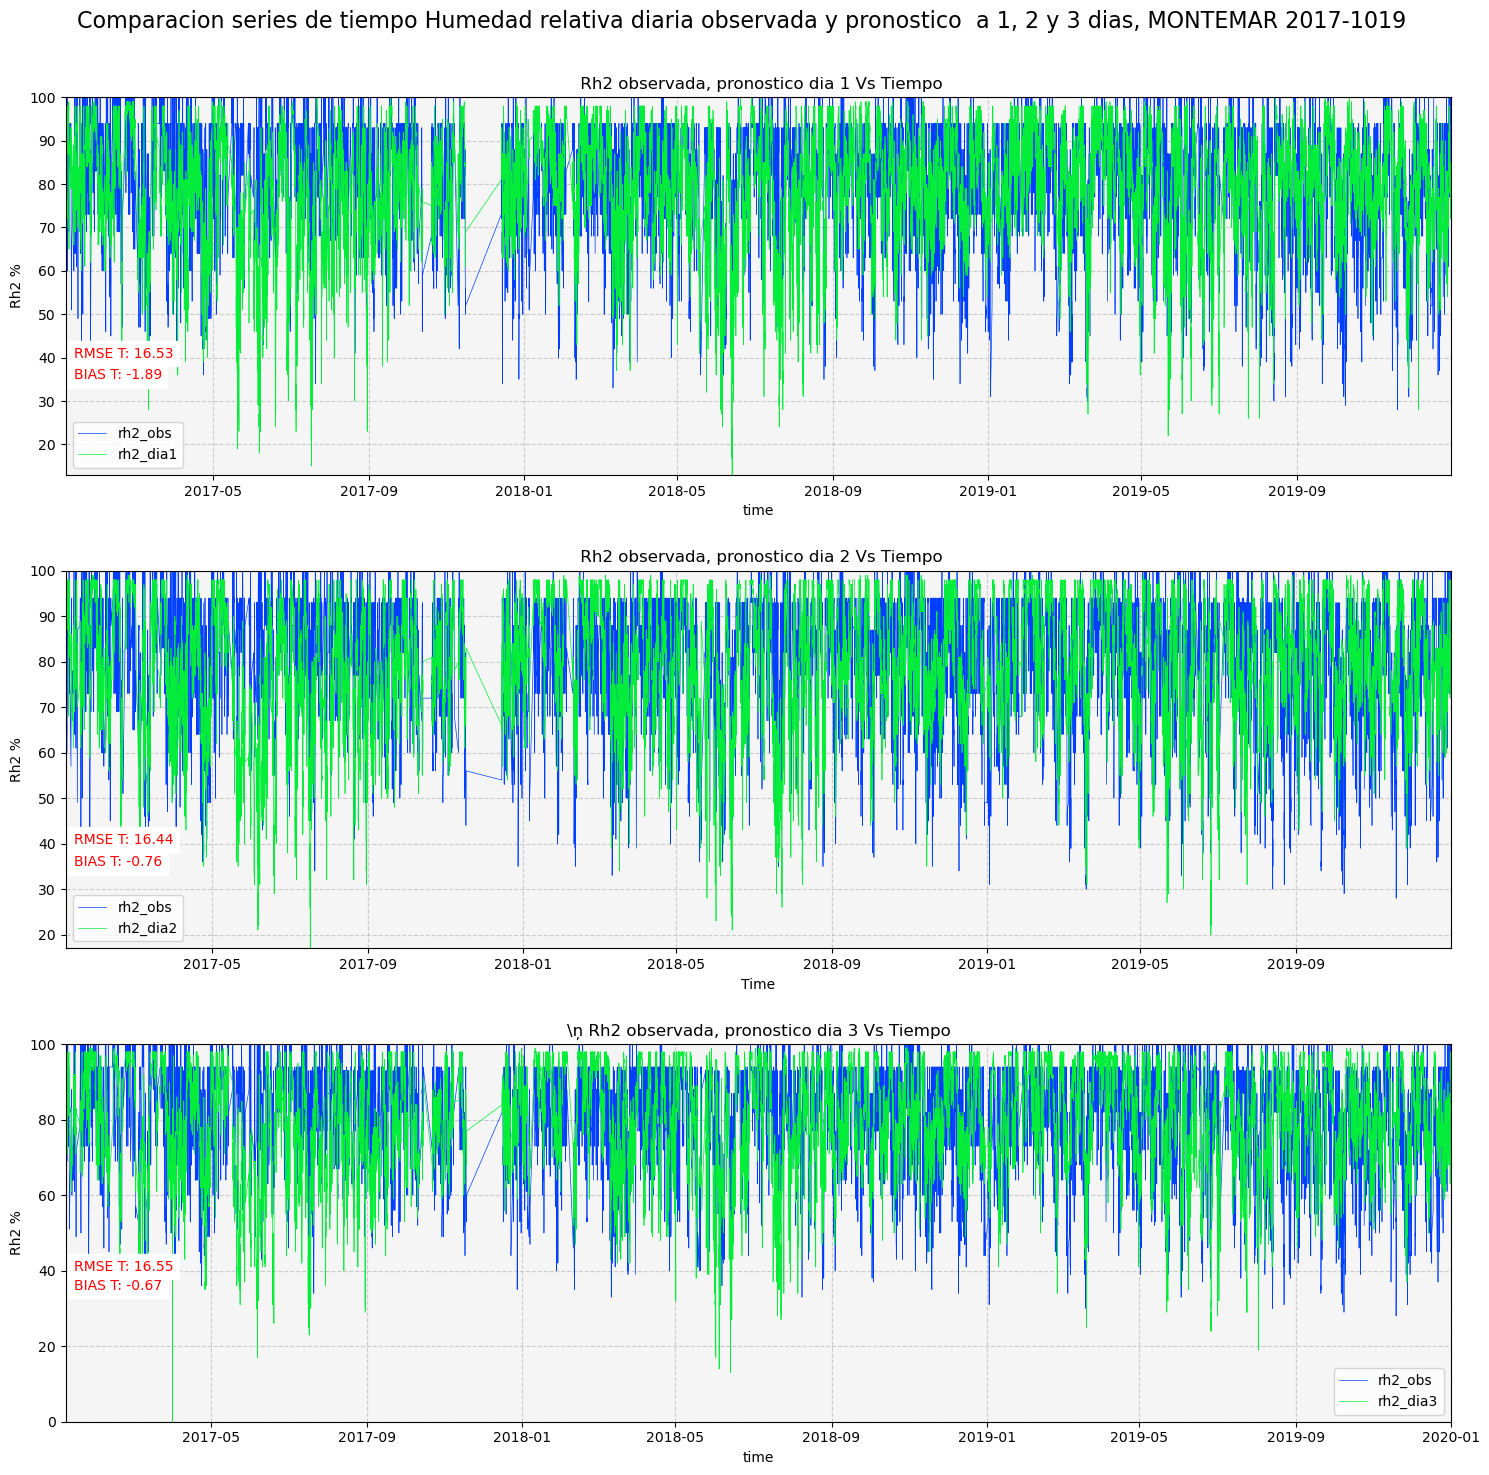

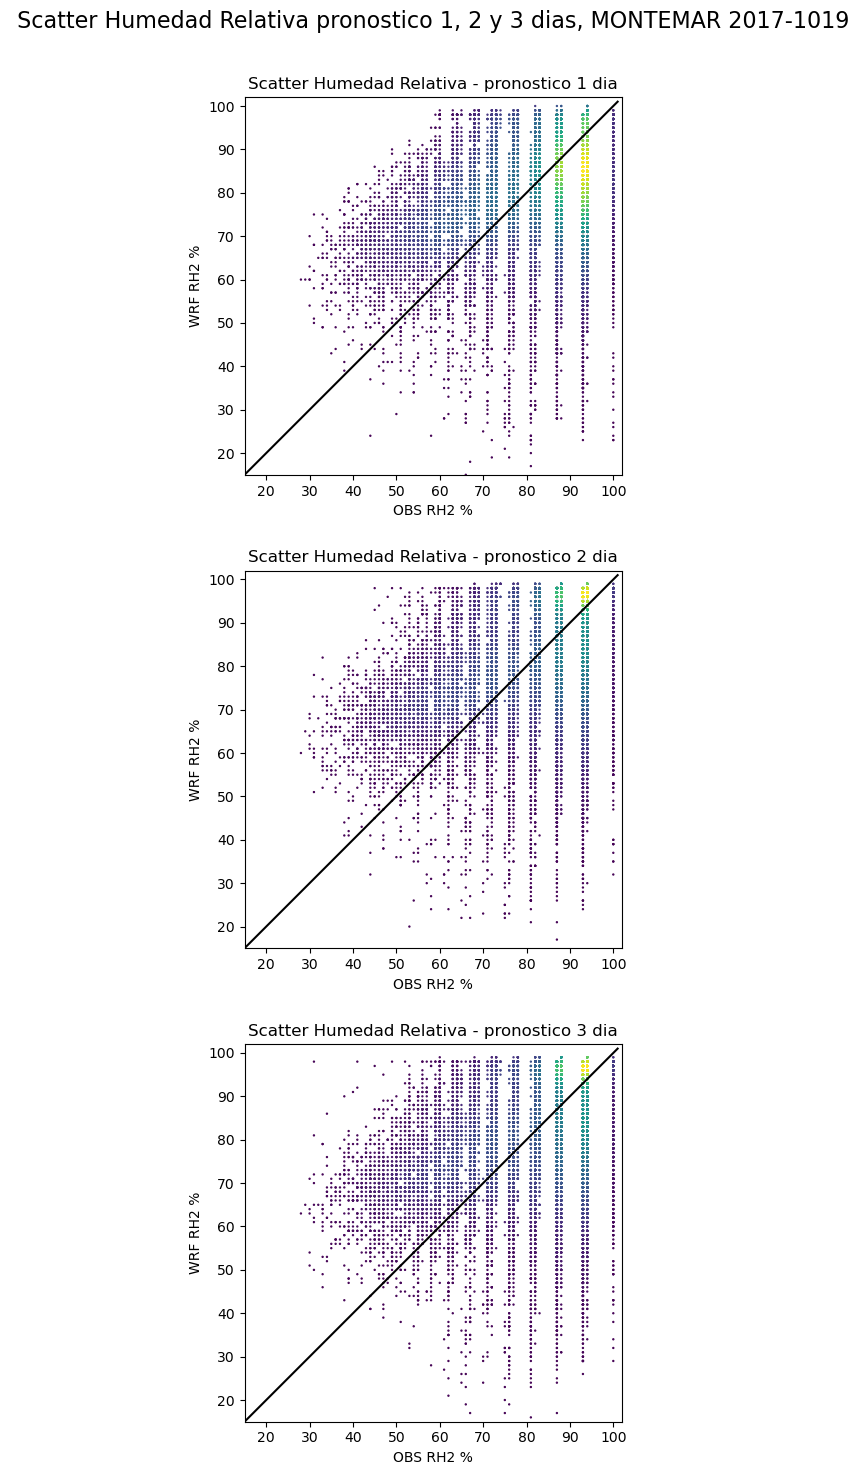

In [16]:

###### HUMEDAD RELATIVA rH2 ######################
########################
var = 'rh2'
unidad = 'Rh2 %'

### almacenamos la variable de interes en df comun con la variable observada, eliminando valores nan
df1 = df_comun1[[var, var + '_obs']].dropna()
values1 = df1[[var, var + '_obs']].values.T

df2 = df_comun2[[var, var + '_obs']].dropna()
values2 = df2[[var, var + '_obs']].values.T

df3 = df_comun3[[var, var + '_obs']].dropna()
values3 = df3[[var, var + '_obs']].values.T


############ promedios y densidad de probabilidad para Rh2

densidad1 = gaussian_kde(values1)(values1)
densidad2 = gaussian_kde(values2)(values2)
densidad3 = gaussian_kde(values3)(values3)

##Calculo RMSE y BIAS para rh2

rmse_rh1 = rm(df1[var],df1[var + '_obs'])
text_rmrh1 = "RMSE T: "+str(round(rmse_rh1,2))
bi_rh1 = bi(df1[var],df1[var + '_obs'])
text_birh1 = "BIAS T: "+str(round(bi_rh1,2))

rmse_rh2 = rm(df2[var],df2[var + '_obs'])
text_rmrh2 = "RMSE T: "+str(round(rmse_rh2,2))
bi_rh2 = bi(df2[var],df2[var + '_obs'])
text_birh2 = "BIAS T: "+str(round(bi_rh2,2))

rmse_rh3 = rm(df3[var],df3[var + '_obs'])
text_rmrh3 = "RMSE T: "+str(round(rmse_rh3,2))
bi_rh3 = bi(df3[var],df3[var + '_obs'])
text_birh3 = "BIAS T: "+str(round(bi_rh3,2))


######################Gaficas
### PANEL 1: SERIES DE TIEMPO:

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Comparacion series de tiempo Humedad relativa diaria observada y pronostico  a 1, 2 y 3 dias, MONTEMAR 2017-1019 \n',
             fontsize=16)

for ax in axes:
    ax.set_facecolor('whitesmoke')
    ax.grid(True, linestyle='--', alpha=0.6)

### plot serie tiempo rh2 obs y dia1
axes[0].plot(df1[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[0].plot(df1[var], 
             label=var+'_dia1',
             linewidth=0.5)
axes[0].set_title('\n Rh2 observada, pronostico dia 1 Vs Tiempo')
axes[0].set_ylabel(unidad)
axes[0].set_xlabel('time')
axes[0].set_xlim(df1.index[0],df1.index[-1])
axes[0].set_ylim(df1[var].min(),100)
axes[0].text(df1.index[100],40,text_rmrh1,color='red',backgroundcolor='white',fontsize=10)
axes[0].text(df1.index[100],35,text_birh1,color='red',backgroundcolor='white',fontsize=10)
axes[0].legend()

### plot serie tiempo temperatura obs y dia2
axes[1].plot(df2[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[1].plot(df2[var], 
             label=var+'_dia2',
             linewidth=0.5)
axes[1].set_title('\n Rh2 observada, pronostico dia 2 Vs Tiempo')
axes[1].set_ylabel(unidad)
axes[1].set_xlabel('Time')
axes[1].set_xlim(df2.index[0],df2.index[-1])
axes[1].set_ylim(df2[var].min(),100)
axes[1].text(df2.index[100],40,text_rmrh2,color='red',backgroundcolor='white',fontsize=10)
axes[1].text(df2.index[100],35,text_birh2, color='red',backgroundcolor='white',fontsize=10)
axes[1].legend()

### plot serie tiempo temperatura obs y dia3
axes[2].plot(df3[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[2].plot(df3[var], 
             label=var+'_dia3',
             linewidth=0.5)
axes[2].set_title('\ņ Rh2 observada, pronostico dia 3 Vs Tiempo')
axes[2].set_ylabel(unidad)
axes[2].set_xlabel('time')
axes[2].set_xlim(df3.index[0],df3.index[-1])
axes[2].set_ylim(df3[var].min(),100)
axes[2].text(df3.index[100],40,text_rmrh3, color='red',backgroundcolor='white',fontsize=10)
axes[2].text(df3.index[100],35,text_birh3, color='red',backgroundcolor='white',fontsize=10)

axes[2].legend()

#plt.savefig('Rh_obs_dia_123_valpo_2017-2019.png')
#plt.savefig('Rh_obs_dia_123_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()

############################################
### panel de graficas scatter temperatura:

fig, axes = plt.subplots(3, 1,figsize=(15, 15))
fig.suptitle(' Scatter Humedad Relativa pronostico 1, 2 y 3 dias, MONTEMAR 2017-1019 \n',
             fontsize=16)

### plot scatter pronostico 1 dia:
axes[0].scatter(df1[var + '_obs'], df1[var], 
                c = densidad1,
                s =0.5)
axes[0].plot([15,101],[15,101],'k')
axes[0].set_title('\nScatter Humedad Relativa - pronostico 1 dia')
axes[0].set_ylabel('WRF RH2 %')
axes[0].set_xlabel('OBS RH2 %')
axes[0].set_xlim(15,102)
axes[0].set_ylim(15,102)
axes[0].set_aspect('equal', adjustable='box')


### plot scatter pronostico 2 dia:
axes[1].scatter(df2[var + '_obs'], df2[var], 
                c = densidad2,
                s =0.5)
axes[1].plot([15,101],[15,101],'k')
axes[1].set_title('\nScatter Humedad Relativa - pronostico 2 dia')
axes[1].set_ylabel('WRF RH2 %')
axes[1].set_xlabel('OBS RH2 %')
axes[1].set_xlim(15,102)
axes[1].set_ylim(15,102)
axes[1].set_aspect('equal', adjustable='box')


### plot scatter pronostico 2 dia:
axes[2].scatter(df3[var + '_obs'], df3[var], 
                c = densidad3,
                s =0.5)
axes[2].plot([15,101],[15,101],'k')
axes[2].set_title('\nScatter Humedad Relativa - pronostico 3 dia')
axes[2].set_ylabel('WRF RH2 %')
axes[2].set_xlabel('OBS RH2 %')
axes[2].set_xlim(15,102)
axes[2].set_ylim(15,102)
axes[2].set_aspect('equal', adjustable='box')


#plt.savefig('scatter_RH2_pronosticos_valpo_2017-2019.png')
#plt.savefig('scatter_RH2_pronosticos_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()


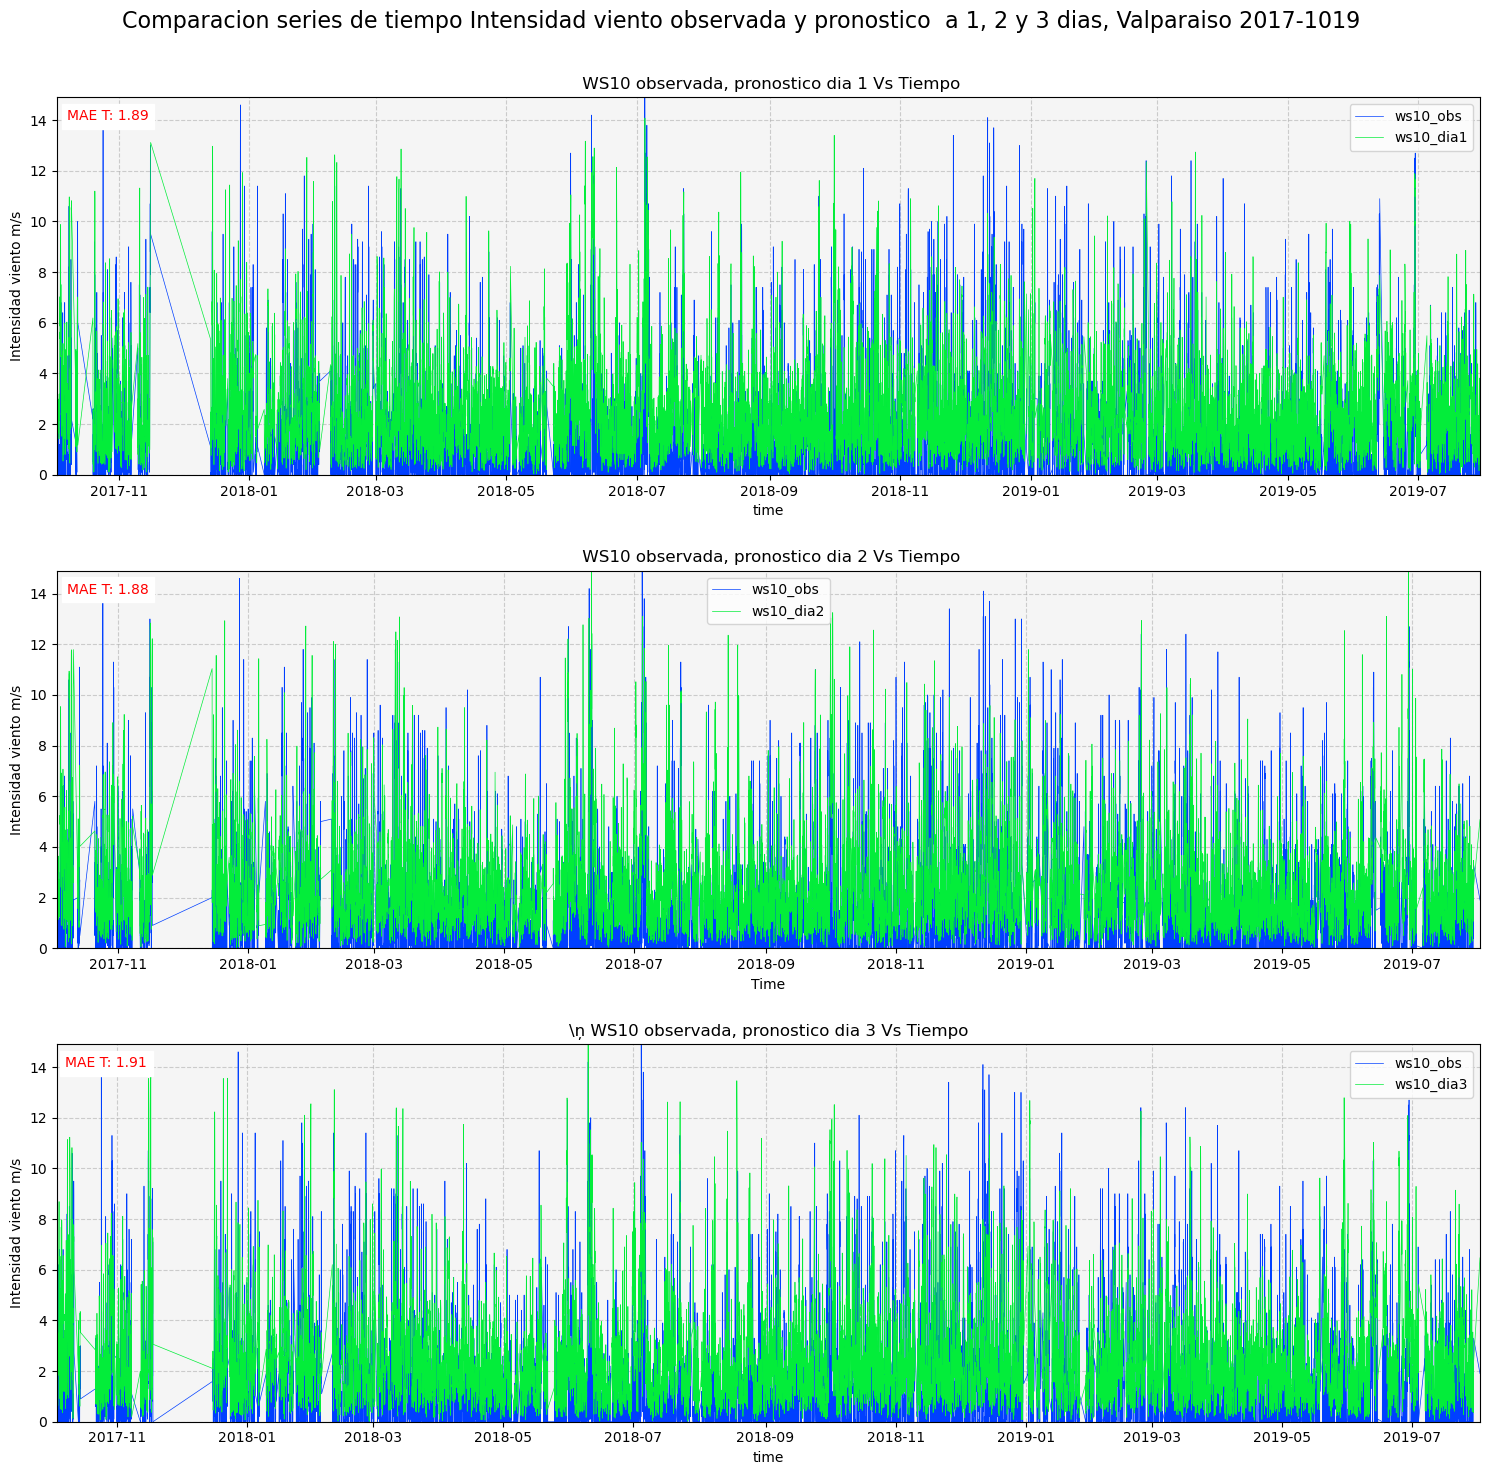

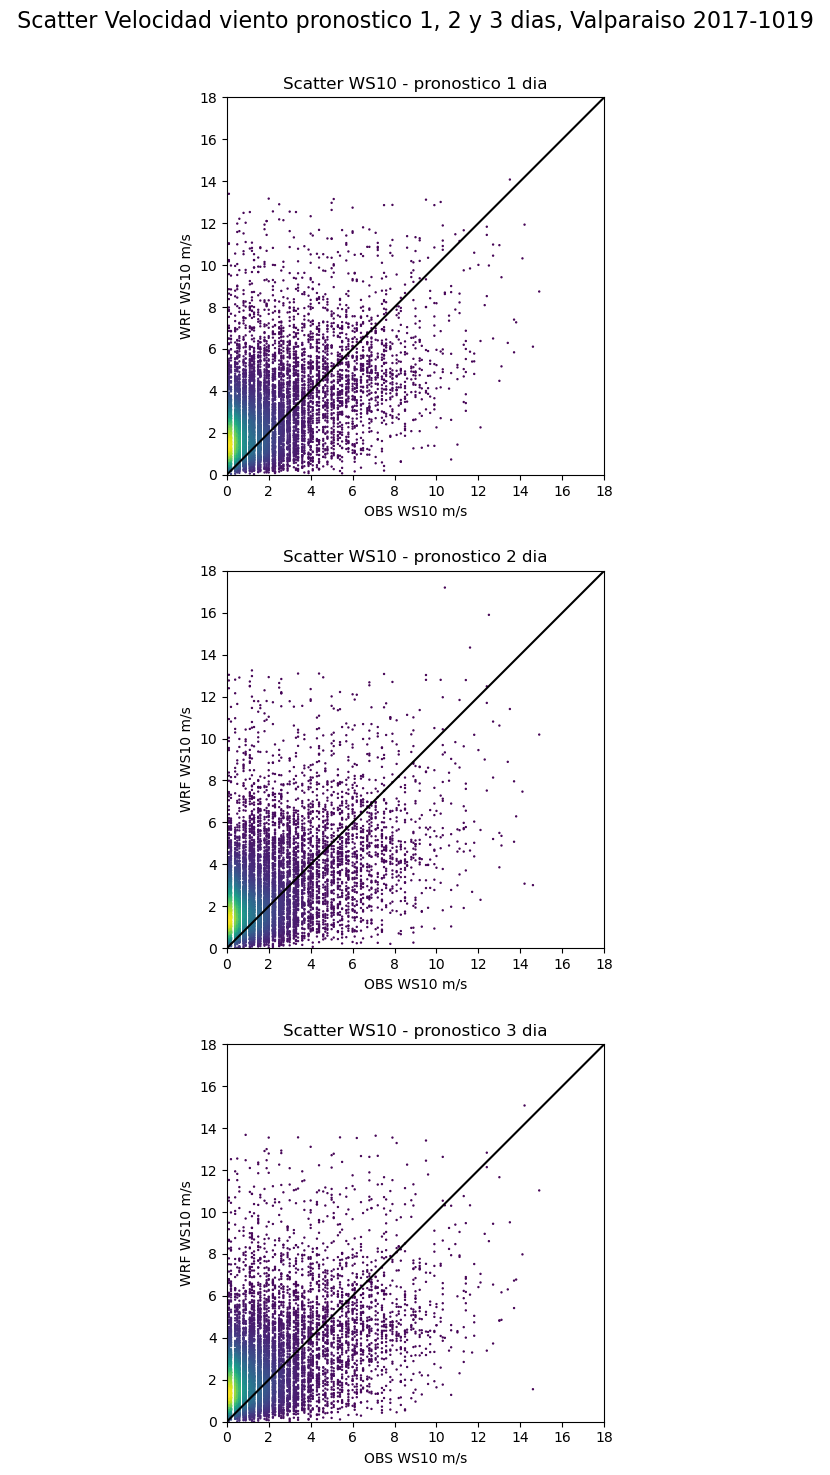

In [99]:

######  VELOCIDAD VIENTO ######################
########################
var = 'ws10'
unidad = 'Intensidad viento m/s'

### almacenamos la variable de interes en df comun con la variable observada, eliminando valores nan
df1 = df_comun1[[var, var + '_obs']].dropna()
values1 = df1[[var, var + '_obs']].values.T

df2 = df_comun2[[var, var + '_obs']].dropna()
values2 = df2[[var, var + '_obs']].values.T

df3 = df_comun3[[var, var + '_obs']].dropna()
values3 = df3[[var, var + '_obs']].values.T


############ promedios y densidad de probabilidad para WS10

densidad1 = gaussian_kde(values1)(values1)
densidad2 = gaussian_kde(values2)(values2)
densidad3 = gaussian_kde(values3)(values3)

##Calculo MAE RMSE y BIAS para WS19

rmse_ws1 = rm(df1[var],df1[var + '_obs'])
text_rmws1 = "RMSE T: "+str(round(rmse_ws1,2))
bi_ws1 = bi(df1[var],df1[var + '_obs'])
text_biws1 = "BIAS T: "+str(round(bi_ws1,2))

rmse_ws2 = rm(df2[var],df2[var + '_obs'])
text_rmws2 = "RMSE T: "+str(round(rmse_ws2,2))
bi_ws2 = bi(df2[var],df2[var + '_obs'])
text_biws2 = "BIAS T: "+str(round(bi_ws2,2))

rmse_ws3 = rm(df3[var],df3[var + '_obs'])
text_rmws3 = "RMSE T: "+str(round(rmse_ws3,2))
bi_ws3 = bi(df3[var],df3[var + '_obs'])
text_biws3 = "BIAS T: "+str(round(bi_ws3,2))

# Python program for calculating Mean Absolute Error
mae_ws1 = mae(df1[var],df1[var + '_obs'])
text_mae1 = "MAE T: "+str(round(mae_ws1,2))
mae_ws2 = mae(df2[var],df2[var + '_obs'])
text_mae2 = "MAE T: "+str(round(mae_ws2,2))
mae_ws3 = mae(df3[var],df3[var + '_obs'])
text_mae3 = "MAE T: "+str(round(mae_ws3,2))

######################Gaficas
### PANEL 1: SERIES DE TIEMPO:

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Comparacion series de tiempo Intensidad viento observada y pronostico  a 1, 2 y 3 dias, Valparaiso 2017-1019 \n',
             fontsize=16)
for ax in axes:
    ax.set_facecolor('whitesmoke')
    ax.grid(True, linestyle='--', alpha=0.6)
    
### plot serie tiempo WS10 obs y dia1
axes[0].plot(df1[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[0].plot(df1[var], 
             label=var+'_dia1',
             linewidth=0.5)
axes[0].set_title('\n WS10 observada, pronostico dia 1 Vs Tiempo')
axes[0].set_ylabel(unidad)
axes[0].set_xlabel('time')
axes[0].set_xlim(df1.index[0],df1.index[-1])
axes[0].set_ylim(df1[var + '_obs'].min(),df1[var + '_obs'].max())
#axes[0].text(df1.index[100],2,text_rmrh1,color='red',backgroundcolor='white',fontsize=10)
#axes[0].text(df1.index[100],1,text_birh1,color='red',backgroundcolor='white',fontsize=10)
axes[0].text(df1.index[100],14,text_mae1,color='red',backgroundcolor='white',fontsize=10)
axes[0].legend()

### plot serie tiempo WS10 obs y dia2
axes[1].plot(df2[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[1].plot(df2[var], 
             label=var+'_dia2',
             linewidth=0.5)
axes[1].set_title('\n WS10 observada, pronostico dia 2 Vs Tiempo')
axes[1].set_ylabel(unidad)
axes[1].set_xlabel('Time')
axes[1].set_xlim(df2.index[0],df2.index[-1])
axes[1].set_ylim(df1[var + '_obs'].min(),df1[var + '_obs'].max())
#axes[1].text(df2.index[100],2,text_rmrh2,color='red',backgroundcolor='white',fontsize=10)
#axes[1].text(df2.index[100],1,text_birh2, color='red',backgroundcolor='white',fontsize=10)
axes[1].text(df1.index[100],14,text_mae2,color='red',backgroundcolor='white',fontsize=10)
axes[1].legend()

### plot serie tiempo WS10 obs y dia3
axes[2].plot(df3[var + '_obs'], 
             label=var + '_obs',
             linewidth=0.5)
axes[2].plot(df3[var], 
             label=var+'_dia3',
             linewidth=0.5)
axes[2].set_title('\ņ WS10 observada, pronostico dia 3 Vs Tiempo')
axes[2].set_ylabel(unidad)
axes[2].set_xlabel('time')
axes[2].set_xlim(df3.index[0],df3.index[-1])
axes[2].set_ylim(df1[var + '_obs'].min(),df1[var + '_obs'].max())
#axes[2].text(df3.index[100],2,text_rmrh3, color='red',backgroundcolor='white',fontsize=10)
#axes[2].text(df3.index[100],1,text_birh3, color='red',backgroundcolor='white',fontsize=10)
axes[2].text(df1.index[100],14,text_mae3,color='red',backgroundcolor='white',fontsize=10)
axes[2].legend()

plt.savefig('WS10_obs_dia_123_valpo_2017-2019.png')
#plt.savefig('WS10_obs_dia_123_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()

############################################
### panel de graficas scatter WS10

fig, axes = plt.subplots(3, 1,figsize=(15, 15))
fig.suptitle(' Scatter Velocidad viento pronostico 1, 2 y 3 dias, Valparaiso 2017-1019 \n',
             fontsize=16)

### plot scatter pronostico 1 dia:
axes[0].scatter(df1[var + '_obs'], df1[var], 
                c = densidad1,
                s =0.5)
axes[0].plot([0,18],[0,18],'k')
axes[0].set_title('\nScatter WS10 - pronostico 1 dia')
axes[0].set_ylabel('WRF WS10 m/s')
axes[0].set_xlabel('OBS WS10 m/s')
axes[0].set_xlim(0,18)
axes[0].set_ylim(0,18)
axes[0].set_aspect('equal', adjustable='box')


### plot scatter pronostico 2 dia:
axes[1].scatter(df2[var + '_obs'], df2[var], 
                c = densidad2,
                s =0.5)
axes[1].plot([0,18],[0,18],'k')
axes[1].set_title('\nScatter WS10 - pronostico 2 dia')
axes[1].set_ylabel('WRF WS10 m/s')
axes[1].set_xlabel('OBS WS10 m/s')
axes[1].set_xlim(0,18)
axes[1].set_ylim(0,18)
axes[1].set_aspect('equal', adjustable='box')


### plot scatter pronostico 2 dia:
axes[2].scatter(df3[var + '_obs'], df3[var], 
                c = densidad3,
                s =0.5)
axes[2].plot([0,18],[0,18],'k')
axes[2].set_title('\nScatter WS10 - pronostico 3 dia')
axes[2].set_ylabel('WRF WS10 m/s')
axes[2].set_xlabel('OBS WS10 m/s')
axes[2].set_xlim(0,18)
axes[2].set_ylim(0,18)
axes[2].set_aspect('equal', adjustable='box')


plt.savefig('scatter_WS10_pronosticos_valpo_2017-2019.png')
#plt.savefig('scatter_WS10_pronosticos_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.tight_layout()
plt.show()


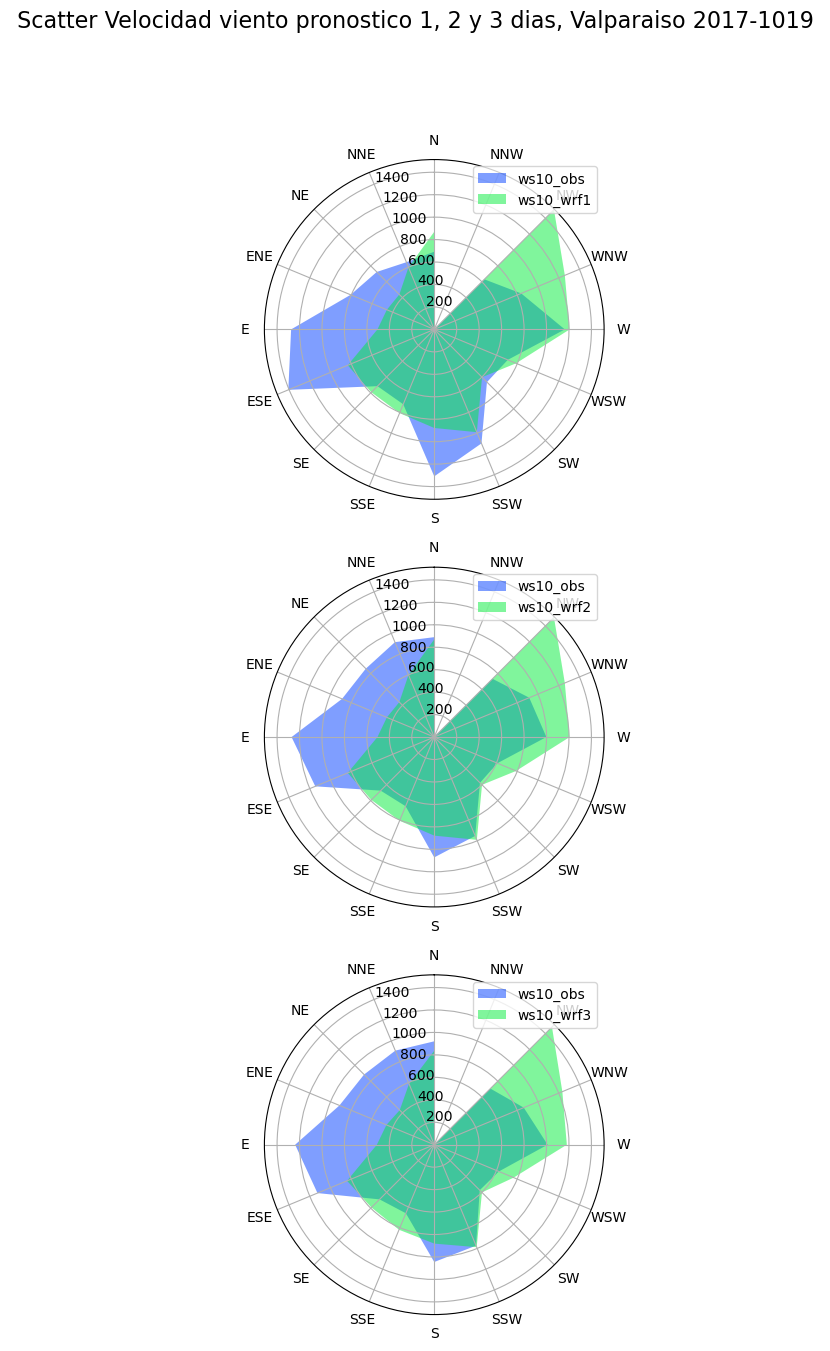

In [95]:


############direccion viento
###########################################
df1 = df_comun1[['ws10_obs','wd10_obs','ws10','wd10']].dropna()
var = 'wd10'
#frecuencia de las direcciones del viento
wind_obs1  = df1[var]
wind_calc1 = df1[var + '_obs']
wind_obs2  = df2[var]
wind_calc2 = df2[var + '_obs']
wind_obs3  = df3[var]
wind_calc3 = df3[var + '_obs']
# Definir los bins y los nombres de las direcciones del viento
directions = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
bins = np.arange(0, 360, 22.5)

# Calcular el histograma de las direcciones del viento observadas y calculadas
hist_obs1, bin_edges = np.histogram(wind_obs1, bins=bins)
hist_obs2, bin_edges = np.histogram(wind_obs2, bins=bins)
hist_obs3, bin_edges = np.histogram(wind_obs3, bins=bins)
hist_calc1, _ = np.histogram(wind_calc1, bins=bins)
hist_calc2, _ = np.histogram(wind_calc1, bins=bins)
hist_calc3, _ = np.histogram(wind_calc3, bins=bins)



fig, axes = plt.subplots(3, 1,subplot_kw={'projection': 'polar'},figsize=(15, 15))
fig.suptitle(' Scatter Velocidad viento pronostico 1, 2 y 3 dias, Valparaiso 2017-1019 \n',
             fontsize=16)


axes[0].set_theta_zero_location("N")
# Configurar las etiquetas de las direcciones del viento
axes[0].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
axes[0].set_xticklabels(directions)
axes[0].set_ylim(0, max(max(hist_obs), max(hist_calc)) + 5)

# Graficar las direcciones del viento observadas y calculadas
axes[0].fill_between(np.deg2rad(bin_edges[:-1]), hist_obs1, alpha=0.5, label='ws10_obs')
axes[0].fill_between(np.deg2rad(bin_edges[:-1]), hist_calc1, alpha=0.5, label='ws10_wrf1')
axes[0].legend()


axes[1].set_theta_zero_location("N")
axes[1].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
axes[1].set_xticklabels(directions)
axes[1].set_ylim(0, max(max(hist_obs), max(hist_calc)) + 5)
axes[1].fill_between(np.deg2rad(bin_edges[:-1]), hist_obs2, alpha=0.5, label='ws10_obs')
axes[1].fill_between(np.deg2rad(bin_edges[:-1]), hist_calc2, alpha=0.5, label='ws10_wrf2')
axes[1].legend()

axes[2].set_theta_zero_location("N")
axes[2].set_xticks(np.deg2rad(np.arange(0, 360, 22.5)))
axes[2].set_xticklabels(directions)
axes[2].set_ylim(0, max(max(hist_obs), max(hist_calc)) + 5)
axes[2].fill_between(np.deg2rad(bin_edges[:-1]), hist_obs3, alpha=0.5, label='ws10_obs')
axes[2].fill_between(np.deg2rad(bin_edges[:-1]), hist_calc3, alpha=0.5, label='ws10_wrf3')
axes[2].legend()

plt.savefig('windrose_Wd10_pronosticos_valpo_2017-2019.png')
plt.savefig('windrose_Wd10_pronosticos_valpo_2017-2019.svg', format='svg', bbox_inches='tight')
plt.show()

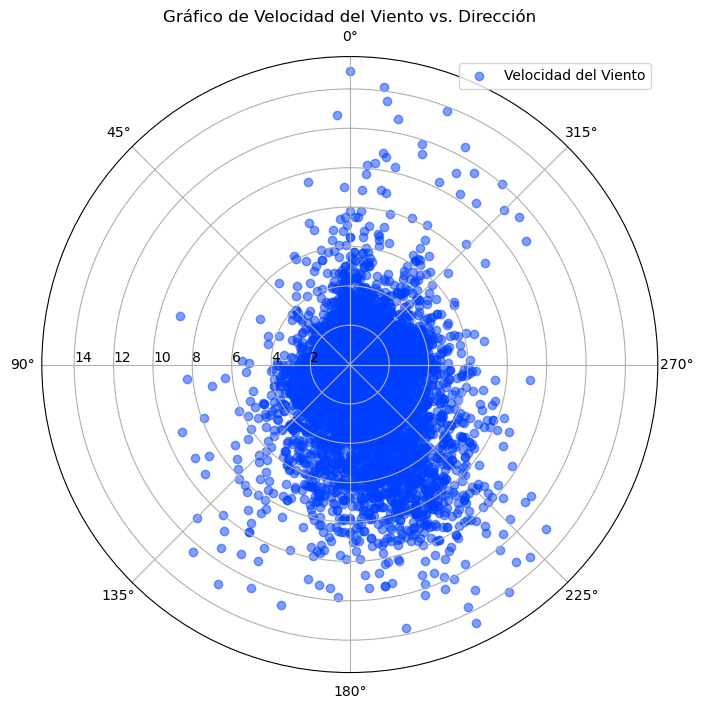

In [96]:
######  VELOCIDAD VIENTO ######################
########################
var = 'wd10'
unidad = 'Intensidad viento m/s'

### almacenamos la variable de interes en df comun con la variable observada, eliminando valores nan
df1 = df_comun1[['ws10_obs','wd10_obs','ws10','wd10']].dropna()



# Paso 1: Calcular los componentes x e y de la velocidad del viento
df1['vx_obs'] = df1['ws10_obs'] * np.sin(np.radians(df1['wd10_obs']))
df1['vy_obs'] = df1['ws10_obs'] * np.cos(np.radians(df1['wd10_obs']))

# Calcular la magnitud de la velocidad del viento
df1['velocidad_obs'] = np.sqrt(df1['vx_obs']**2 + df1['vy_obs']**2)

# Definir las direcciones y la velocidad observada
direcciones = np.radians(df1['wd10_obs'])
velocidades = df1['ws10_obs']

# Crear el gráfico de dispersión polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Configurar la dirección del 0° al norte
ax.set_theta_zero_location("N")

# Configurar el rango de valores del eje radial
ax.set_rlabel_position(90)  # Colocar las etiquetas del eje radial afuera

# Graficar la velocidad del viento vs. la dirección
scatter = ax.scatter(direcciones, velocidades, alpha=0.5)

# Agregar una leyenda
ax.legend([scatter], ['Velocidad del Viento'])

# Agregar un título
plt.title('Gráfico de Velocidad del Viento vs. Dirección')

# Mostrar el gráfico
plt.show()


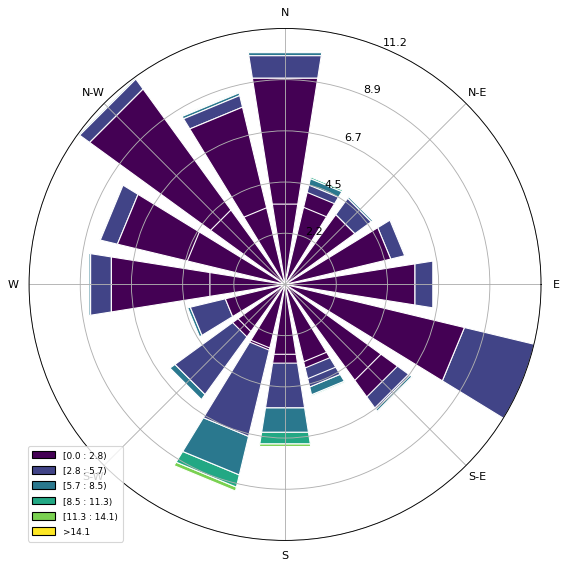

In [56]:

from windrose import WindroseAxes

df1 = df_comun1[['ws10_obs','wd10_obs','ws10','wd10']].dropna()
ax = WindroseAxes.from_ax()
ax.bar(df1['wd10_obs'], df1['ws10_obs'], normed=True, opening=0.8, edgecolor='white')
ax.bar(df1['wd10'], df1['ws10'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

